# **ECE 657A: Data and Knowledge Modeling and Analysis**

**Assignment 1: Data Cleaning and Dimensionality ReducEon**

Submitted By Group 26:

1. Neeraj Nagar (ID: 21107021)
2. Seturaj Matroja (ID: 21064444)
3. Akshat Baheti (ID: 21100660)

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# **Question** **I. Data Cleaning and Preprocessing (for dataset A)**

**1. Detect any problems that need to be fixed in dataset A. Report such problems.**


Based on the analysis of dataset A, the following problems were identified:

**i. First Column unnamed is not required.**

*   The first column does not have a meaningfull name and seems redundant as pandas automatically provides an index.
*   This column could be removed from the dataset

**ii. Feature 34, 35, and 36 columns have only 1 non-null value.**

*   This suggests that these columns may not contain sufficient information to be meaningful for analysis.
*   These columns could be candidates for removal from the dataset



**iii. The last 773 rows of the data set values are missing 18,227 to 18,999.**


*   It seems there is a significant chunk of missing data in the last portion of the dataset.

**iv. Missing values or Null values present in the data set.**


*    Identify the presence of missing or null values in the dataset




**v. Outliers present in the data.**


*    Perform outlier detection to identify extreme values in the dataset using box plots that might adversely affect analysis or modeling.




In [169]:
#Load the dataset
DataA = pd.read_csv('DataA.csv',encoding='latin-1')
DataA.head()

,Unnamed: 0,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,...,fea.72,fea.73,fea.74,fea.75,fea.76,fea.77,fea.78,fea.79,fea.80,fea.81
0,1,-153.0,414.0,939.0,-161.0,1007.0,99.0,-210.0,948.0,333.0,...,655.0,-316.0,-302.0,-617.0,-955.0,-264.0,23.0,-29.0,36.0,24.0
1,2,-150.0,420.0,939.0,-177.0,1008.0,103.0,-207.0,939.0,316.0,...,655.0,-309.0,-304.0,-619.0,-955.0,-265.0,19.0,-31.0,47.0,3.0
2,3,-160.0,432.0,941.0,-162.0,982.0,98.0,-198.0,936.0,315.0,...,655.0,-302.0,-308.0,-621.0,-966.0,-270.0,10.0,-38.0,20.0,0.0
3,4,-171.0,432.0,911.0,-174.0,999.0,115.0,-187.0,918.0,338.0,...,655.0,-293.0,-312.0,-622.0,-964.0,-269.0,14.0,-51.0,33.0,-1.0
4,5,-171.0,NaN,929.0,-189.0,1004.0,104.0,-198.0,939.0,350.0,...,655.0,-284.0,-318.0,-624.0,-966.0,-262.0,24.0,-40.0,1.0,4.0


In [170]:
#Print the columns
print(DataA.columns)

Index(['Unnamed: 0', 'fea.1', 'fea.2', 'fea.3', 'fea.4', 'fea.5', 'fea.6',
       'fea.7', 'fea.8', 'fea.9', 'fea.10', 'fea.11', 'fea.12', 'fea.13',
       'fea.14', 'fea.15', 'fea.16', 'fea.17', 'fea.18', 'fea.19', 'fea.20',
       'fea.21', 'fea.22', 'fea.23', 'fea.24', 'fea.25', 'fea.26', 'fea.27',
       'fea.28', 'fea.29', 'fea.30', 'fea.31', 'fea.32', 'fea.33', 'fea.34',
       'fea.35', 'fea.36', 'fea.37', 'fea.38', 'fea.39', 'fea.40', 'fea.41',
       'fea.42', 'fea.43', 'fea.44', 'fea.45', 'fea.46', 'fea.47', 'fea.48',
       'fea.49', 'fea.50', 'fea.51', 'fea.52', 'fea.53', 'fea.54', 'fea.55',
       'fea.56', 'fea.57', 'fea.58', 'fea.59', 'fea.60', 'fea.61', 'fea.62',
       'fea.63', 'fea.64', 'fea.65', 'fea.66', 'fea.67', 'fea.68', 'fea.69',
       'fea.70', 'fea.71', 'fea.72', 'fea.73', 'fea.74', 'fea.75', 'fea.76',
       'fea.77', 'fea.78', 'fea.79', 'fea.80', 'fea.81'],
      dtype='object')


In [171]:
#Get the shape of the dataset
DataA.shape

(19000, 82)

In [172]:
#Get top 5 rows of the dataset
DataA.head()

,Unnamed: 0,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,...,fea.72,fea.73,fea.74,fea.75,fea.76,fea.77,fea.78,fea.79,fea.80,fea.81
0,1,-153.0,414.0,939.0,-161.0,1007.0,99.0,-210.0,948.0,333.0,...,655.0,-316.0,-302.0,-617.0,-955.0,-264.0,23.0,-29.0,36.0,24.0
1,2,-150.0,420.0,939.0,-177.0,1008.0,103.0,-207.0,939.0,316.0,...,655.0,-309.0,-304.0,-619.0,-955.0,-265.0,19.0,-31.0,47.0,3.0
2,3,-160.0,432.0,941.0,-162.0,982.0,98.0,-198.0,936.0,315.0,...,655.0,-302.0,-308.0,-621.0,-966.0,-270.0,10.0,-38.0,20.0,0.0
3,4,-171.0,432.0,911.0,-174.0,999.0,115.0,-187.0,918.0,338.0,...,655.0,-293.0,-312.0,-622.0,-964.0,-269.0,14.0,-51.0,33.0,-1.0
4,5,-171.0,NaN,929.0,-189.0,1004.0,104.0,-198.0,939.0,350.0,...,655.0,-284.0,-318.0,-624.0,-966.0,-262.0,24.0,-40.0,1.0,4.0


In [173]:
# Dropping the 'Unnamed: 0' column and reset the index for the columns
DataA = DataA.drop('Unnamed: 0',axis=1)
DataA = DataA.reset_index(drop=True)

In [174]:
# Now there are 81 columns
DataA.head()

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.72,fea.73,fea.74,fea.75,fea.76,fea.77,fea.78,fea.79,fea.80,fea.81
0,-153.0,414.0,939.0,-161.0,1007.0,99.0,-210.0,948.0,333.0,-19.0,...,655.0,-316.0,-302.0,-617.0,-955.0,-264.0,23.0,-29.0,36.0,24.0
1,-150.0,420.0,939.0,-177.0,1008.0,103.0,-207.0,939.0,316.0,9.0,...,655.0,-309.0,-304.0,-619.0,-955.0,-265.0,19.0,-31.0,47.0,3.0
2,-160.0,432.0,941.0,-162.0,982.0,98.0,-198.0,936.0,315.0,-10.0,...,655.0,-302.0,-308.0,-621.0,-966.0,-270.0,10.0,-38.0,20.0,0.0
3,-171.0,432.0,911.0,-174.0,999.0,115.0,-187.0,918.0,338.0,34.0,...,655.0,-293.0,-312.0,-622.0,-964.0,-269.0,14.0,-51.0,33.0,-1.0
4,-171.0,NaN,929.0,-189.0,1004.0,104.0,-198.0,939.0,350.0,60.0,...,655.0,-284.0,-318.0,-624.0,-966.0,-262.0,24.0,-40.0,1.0,4.0


In [175]:
DataA.shape

(19000, 81)

In [176]:
# Knowing the dataset
# Checking the non-null and null values for each columns
DataA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19000 entries, 0 to 18999
Data columns (total 81 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fea.1   17813 non-null  float64
 1   fea.2   17812 non-null  float64
 2   fea.3   17813 non-null  float64
 3   fea.4   18200 non-null  float64
 4   fea.5   18200 non-null  float64
 5   fea.6   18200 non-null  float64
 6   fea.7   18099 non-null  float64
 7   fea.8   18099 non-null  float64
 8   fea.9   18099 non-null  float64
 9   fea.10  18043 non-null  float64
 10  fea.11  18044 non-null  float64
 11  fea.12  18044 non-null  float64
 12  fea.13  17950 non-null  float64
 13  fea.14  17950 non-null  float64
 14  fea.15  17950 non-null  float64
 15  fea.16  18202 non-null  float64
 16  fea.17  18202 non-null  float64
 17  fea.18  18202 non-null  float64
 18  fea.19  17964 non-null  float64
 19  fea.20  17964 non-null  float64
 20  fea.21  17964 non-null  float64
 21  fea.22  17677 non-null  float64
 22

In [177]:
# Checking total null values in columns
DataA.isnull().sum()

fea.1     1187
fea.2     1188
fea.3     1187
fea.4      800
fea.5      800
          ... 
fea.77     773
fea.78     773
fea.79     773
fea.80     773
fea.81     773
Length: 81, dtype: int64

In [178]:
# last 773 column has Null values
DataA.tail(773)

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.72,fea.73,fea.74,fea.75,fea.76,fea.77,fea.78,fea.79,fea.80,fea.81
18227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
# Last 773 rows of the dataset are missing
df_na = DataA.any(skipna=True, axis=1)
df_na[df_na==False].shape[0]

773

In [180]:
DataA.describe()

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.72,fea.73,fea.74,fea.75,fea.76,fea.77,fea.78,fea.79,fea.80,fea.81
count,17813.000000,17812.000000,17813.000000,18200.000000,18200.000000,18200.000000,18099.000000,18099.000000,18099.000000,18043.000000,...,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000
mean,-132.812384,698.264485,597.541402,-307.128462,909.548077,-32.760824,61.974363,899.313498,81.650478,356.638752,...,-124.658035,-37.973391,137.400176,374.762934,-880.583804,-47.607780,137.641192,-18.099523,4.671257,20.726834
std,284.183187,375.672475,396.654659,183.151634,193.963300,254.001018,317.393784,196.829252,327.904371,343.131382,...,481.492994,355.841529,352.788441,583.792739,217.634117,373.064609,248.988603,778.015520,480.779966,455.160604
min,-2724.000000,-855.000000,-2196.000000,-1365.000000,-245.000000,-920.000000,-1580.000000,-149.000000,-1624.000000,-1792.000000,...,-953.000000,-853.000000,-771.000000,-984.000000,-2562.000000,-5424.000000,-3133.000000,-7189.000000,-5861.000000,-3051.000000
25%,-179.000000,360.000000,304.000000,-409.000000,860.000000,-144.000000,-131.000000,854.000000,-155.000000,158.000000,...,-487.000000,-323.000000,-173.000000,29.000000,-983.000000,-276.000000,31.000000,-246.500000,-118.000000,-115.000000
50%,-100.000000,811.000000,574.000000,-266.000000,969.500000,-39.000000,70.000000,946.000000,41.000000,380.000000,...,-223.000000,32.000000,251.000000,698.000000,-940.000000,0.000000,132.000000,-29.000000,4.000000,19.000000
75%,-15.000000,984.000000,955.000000,-167.000000,1006.000000,45.000000,251.000000,997.000000,315.000000,583.000000,...,174.000000,179.000000,413.000000,823.000000,-840.000000,225.000000,276.000000,195.000000,115.000000,169.000000
max,1887.000000,2531.000000,2941.000000,609.000000,1833.000000,1215.000000,1490.000000,1682.000000,1096.000000,2202.000000,...,949.000000,775.000000,759.000000,999.000000,613.000000,4877.000000,3742.000000,7497.000000,8675.000000,5821.000000


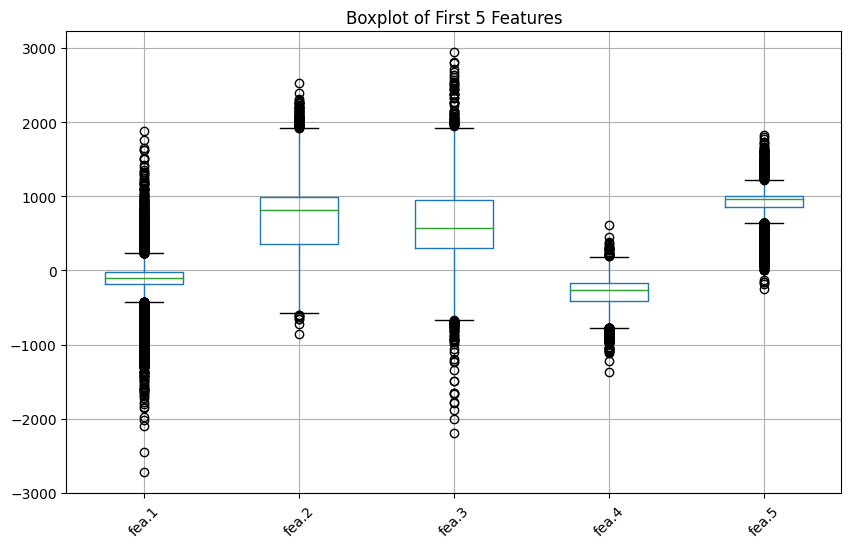

In [181]:
# Select the first 5 features
first_5_features = DataA.iloc[:, :5]

# Create box plots for the first 5 features
first_5_features.boxplot(figsize=(10, 6))
plt.title('Boxplot of First 5 Features')
plt.xticks(rotation=45)
plt.show()





**2. Fix the detected problems using some of the methods discussed in class.**

**i. First column unnamed does not provide any information.**

**Solution:**
Since unnamed column is just an index, dropping it is a reasonable solution. This can be done using the drop method.

**ii. Feature 34, 35, and 36 columns have only 1 non-null value.**

**Solution:**
Since these columns have only one non-null value, they are unlikely to contribute meaningful information to our analysis. Therefore, dropping them is a reasonable solution. This can be done using the drop method.

**iii. The last 773 rows of the data set values are missing 18,227 to 18,999**

**Solution:** As these last 773 rows contain incomplete data and may not contribute meaningfully to the analysis, consider dropping these rows.
By dropping these rows, we ensure that this dataset is more consistent and reliable for further analysis or modeling.

**iv. Missing values or Null values present in the data set.**

**Solution:**
Used DataA.fillna(DataA.median(), inplace=True) to replace missing values with the median of each column.


**v. Outliers present in the data.**

**Solution:**
In the dataset, the Interquartile Range (IQR) method is being utilized to detect and smooth outliers using a custom function. Through iteration over each numerical column, extreme values beyond a specified IQR range are replaced with the nearest boundary.

In [182]:
DataA.shape

(19000, 81)

In [183]:
# Remove columns 'fea.34', 'fea.35', and 'fea.36' from the DataFrame DataA
DataA=DataA.drop(columns=['fea.34','fea.35','fea.36'])
# Display information about the DataFrame to show the non-null values present in each column
DataA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19000 entries, 0 to 18999
Data columns (total 78 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fea.1   17813 non-null  float64
 1   fea.2   17812 non-null  float64
 2   fea.3   17813 non-null  float64
 3   fea.4   18200 non-null  float64
 4   fea.5   18200 non-null  float64
 5   fea.6   18200 non-null  float64
 6   fea.7   18099 non-null  float64
 7   fea.8   18099 non-null  float64
 8   fea.9   18099 non-null  float64
 9   fea.10  18043 non-null  float64
 10  fea.11  18044 non-null  float64
 11  fea.12  18044 non-null  float64
 12  fea.13  17950 non-null  float64
 13  fea.14  17950 non-null  float64
 14  fea.15  17950 non-null  float64
 15  fea.16  18202 non-null  float64
 16  fea.17  18202 non-null  float64
 17  fea.18  18202 non-null  float64
 18  fea.19  17964 non-null  float64
 19  fea.20  17964 non-null  float64
 20  fea.21  17964 non-null  float64
 21  fea.22  17677 non-null  float64
 22

In [184]:
# Drop the last 773 rows
DataA = DataA.iloc[:-773]
DataA.shape

(18227, 78)

In [185]:
# Fill null values with median
DataA.fillna(DataA.median(), inplace=True)
DataA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18227 entries, 0 to 18226
Data columns (total 78 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fea.1   18227 non-null  float64
 1   fea.2   18227 non-null  float64
 2   fea.3   18227 non-null  float64
 3   fea.4   18227 non-null  float64
 4   fea.5   18227 non-null  float64
 5   fea.6   18227 non-null  float64
 6   fea.7   18227 non-null  float64
 7   fea.8   18227 non-null  float64
 8   fea.9   18227 non-null  float64
 9   fea.10  18227 non-null  float64
 10  fea.11  18227 non-null  float64
 11  fea.12  18227 non-null  float64
 12  fea.13  18227 non-null  float64
 13  fea.14  18227 non-null  float64
 14  fea.15  18227 non-null  float64
 15  fea.16  18227 non-null  float64
 16  fea.17  18227 non-null  float64
 17  fea.18  18227 non-null  float64
 18  fea.19  18227 non-null  float64
 19  fea.20  18227 non-null  float64
 20  fea.21  18227 non-null  float64
 21  fea.22  18227 non-null  float64
 22

In [186]:
# Function to smooth outliers using IQR
def smooth_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    column[column < lower_bound] = lower_bound
    column[column > upper_bound] = upper_bound
    return column

# Apply the function to each numerical column in the DataFrame
numerical_columns = DataA.select_dtypes(include='number').columns
for column in numerical_columns:
    DataA[column] = smooth_outliers_iqr(DataA[column])

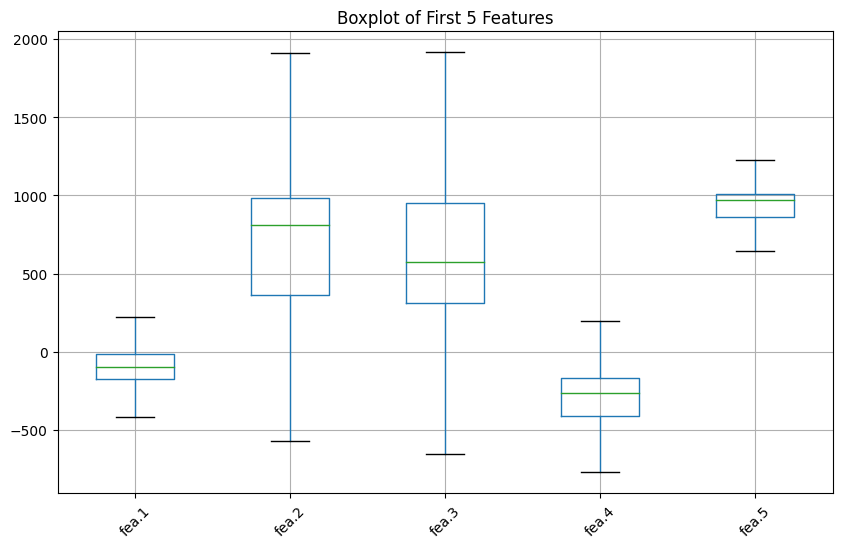

In [187]:
# Select the first 5 features
first_5_features = DataA.iloc[:, :5]

# Create box plots for the first 5 features
first_5_features.boxplot(figsize=(10, 6))
plt.title('Boxplot of First 5 Features')
plt.xticks(rotation=45)
plt.show()

**3. Normalize the data using min-max and z-score normalization. Plot histograms of feature
9 and 24; compare and comment on the differences before and after normalization.**




In [188]:
# We have compare the feature 9 and 24 before and after normalization using 2 types plot diagram.
# Extract features 9 and 24
feature_9 = DataA['fea.9']
feature_24 = DataA['fea.24']

# Initialize MinMaxScaler and StandardScaler objects
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Min-max normalization
feature_9_minmax = min_max_scaler.fit_transform(feature_9.values.reshape(-1, 1))
feature_24_minmax = min_max_scaler.fit_transform(feature_24.values.reshape(-1, 1))

# Z-score normalization
feature_9_zscore = standard_scaler.fit_transform(feature_9.values.reshape(-1, 1))
feature_24_zscore = standard_scaler.fit_transform(feature_24.values.reshape(-1, 1))

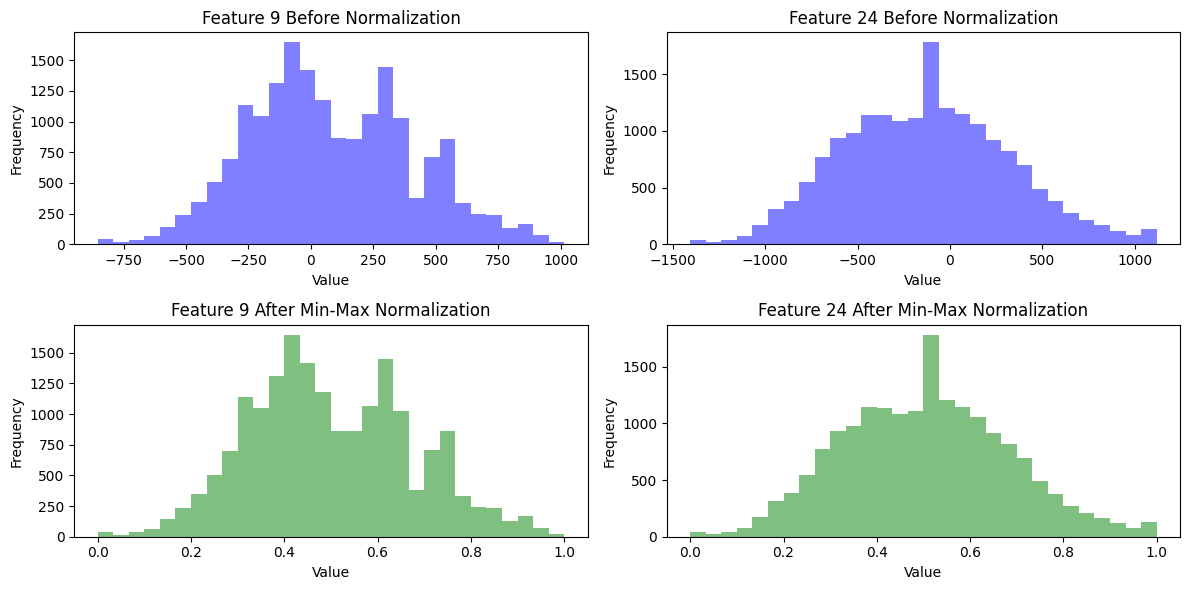

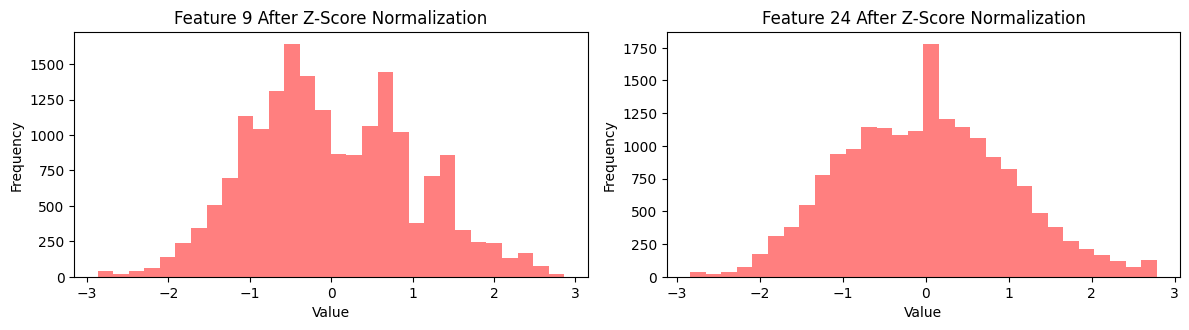

In [189]:
# Plot-1 diagram

# Plot histograms before and after normalization
plt.figure(figsize=(12, 6))

# Before normalization, the histograms of features 9 and 24 show the distribution of their values in their original scales.
plt.subplot(2, 2, 1)
plt.hist(feature_9, bins=30, color='blue', alpha=0.5)
plt.title('Feature 9 Before Normalization')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(feature_24, bins=30, color='blue', alpha=0.5)
plt.title('Feature 24 Before Normalization')
plt.xlabel('Value')
plt.ylabel('Frequency')

# After Min-Max normalization, both features have values scaled between 0 and 1.
# The shape of the distribution remains similar, but the scale is adjusted.
plt.subplot(2, 2, 3)
plt.hist(feature_9_minmax, bins=30, color='green', alpha=0.5)
plt.title('Feature 9 After Min-Max Normalization')
plt.xlabel('Value')
plt.ylabel('Frequency')


plt.subplot(2, 2, 4)
plt.hist(feature_24_minmax, bins=30, color='green', alpha=0.5)
plt.title('Feature 24 After Min-Max Normalization')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

# After z-score normalization, the histograms show distributions centered around 0 with a standard deviation of 1.
# The original shape of the distribution is preserved, but the scale is standardized
plt.subplot(2, 2, 1)
plt.hist(feature_9_zscore, bins=30, color='red', alpha=0.5)
plt.title('Feature 9 After Z-Score Normalization')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(feature_24_zscore, bins=30, color='red', alpha=0.5)
plt.title('Feature 24 After Z-Score Normalization')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

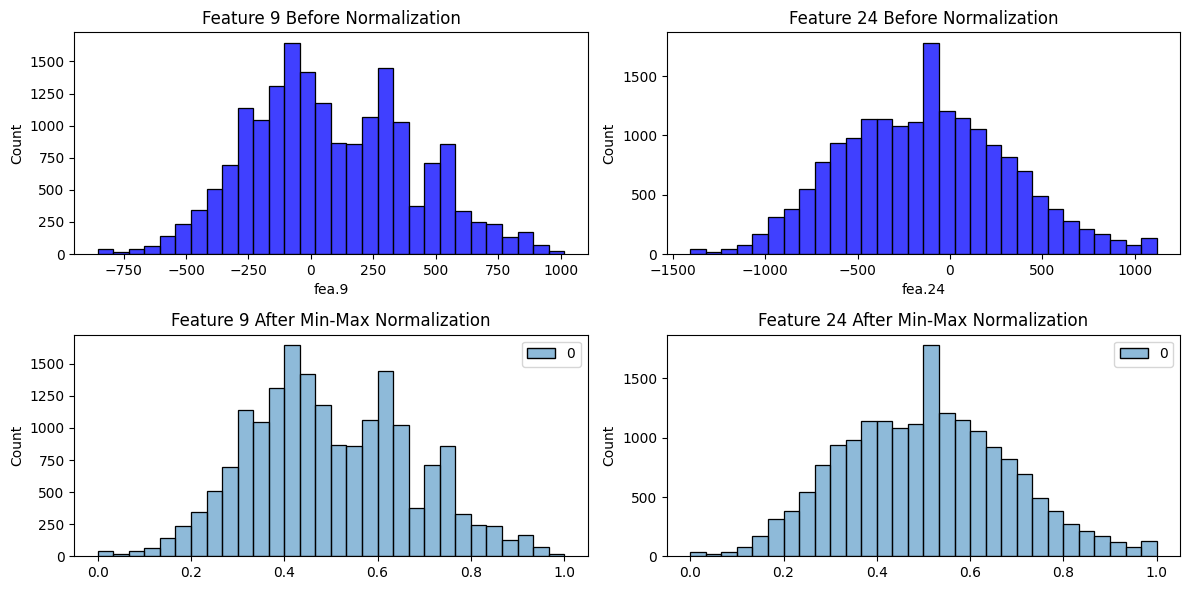

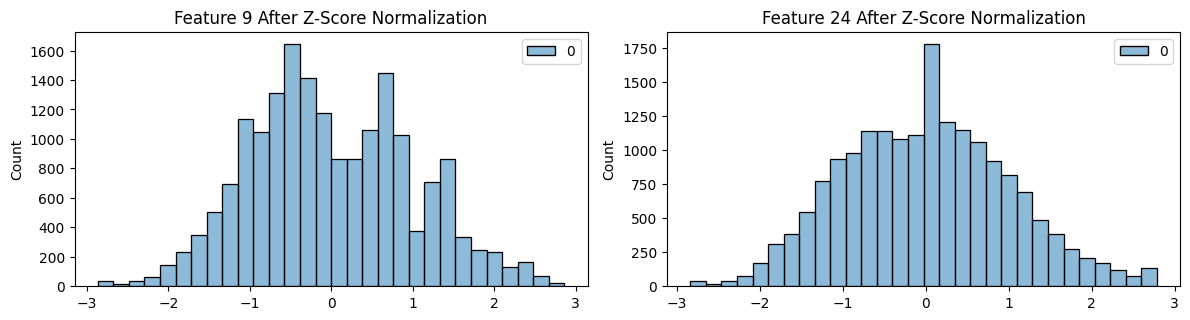

In [190]:
# Plot-2 diagram

# Plot histograms before and after normalization
plt.figure(figsize=(12, 6))

# Before normalization, the histograms of features 9 and 24 show the distribution of their values in their original scales.
plt.subplot(2, 2, 1)
sns.histplot(feature_9, bins=30, color='blue')
plt.title('Feature 9 Before Normalization')

plt.subplot(2, 2, 2)
sns.histplot(feature_24, bins=30, color='blue')
plt.title('Feature 24 Before Normalization')

# After Min-Max normalization, both features have values scaled between 0 and 1.
# The shape of the distribution remains similar, but the scale is adjusted.
plt.subplot(2, 2, 3)
sns.histplot(feature_9_minmax, bins=30, color='green')
plt.title('Feature 9 After Min-Max Normalization')

plt.subplot(2, 2, 4)
sns.histplot(feature_24_minmax, bins=30, color='green')
plt.title('Feature 24 After Min-Max Normalization')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

# After z-score normalization, the histograms show distributions centered around 0 with a standard deviation of 1.
# The original shape of the distribution is preserved, but the scale is standardized
plt.subplot(2, 2, 1)
sns.histplot(feature_9_zscore, bins=30, color='red')
plt.title('Feature 9 After Z-Score Normalization')

plt.subplot(2, 2, 2)
sns.histplot(feature_24_zscore, bins=30, color='red')
plt.title('Feature 24 After Z-Score Normalization')

plt.tight_layout()
plt.show()

**Analysis**

**Data normalization using min-max and z-score methods was conducted, followed by a comparison of histograms for features 9 and 24 before and after normalization.**

**Before normalization, the histograms show the raw distributions of features 9 and 24, which may have varying scales and spreads. After normalization:**

**i. Min-Max normalization (green histograms) scales both features to a range between 0 and 1, preserving the original distribution shape but standardizing the scale.**

**ii. Z-score normalization (red histograms) centers the data around a mean of 0 and scales it according to the standard deviation, resulting in standardized distributions with mean values close to 0 and a standard deviation of 1.**

# **Question** **II. Feature Extraction (for dataset B)**

**1. Use PCA as a dimensionality reduction technique to the data, compute the eigenvectors
and eigenvalues.**

In [191]:
#Load the dataset
DataB = pd.read_csv('DataB.csv',encoding='latin-1')
# Seperating the classes and features
DataB_X = DataB.iloc[:,:-1]
DataB_Y = DataB.iloc[:,-1]
DataB.head()

,Unnamed: 0,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,...,fea.776,fea.777,fea.778,fea.779,fea.780,fea.781,fea.782,fea.783,fea.784,gnd
0,1,4,4,3,0,0,4,2,1,4,...,1,3,0,4,2,1,1,4,5,0
1,2,5,1,4,3,1,3,5,1,4,...,1,1,3,3,1,3,3,5,4,0
2,3,1,3,0,3,1,1,0,1,0,...,3,0,2,4,2,2,1,2,4,0
3,4,5,3,2,3,5,2,2,0,4,...,5,4,5,1,4,4,2,4,4,0
4,5,3,5,3,3,0,4,1,1,4,...,1,3,3,3,1,2,4,1,1,0


In [192]:
DataB.shape

(2066, 786)

In [193]:
print(DataB.columns)

Index(['Unnamed: 0', 'fea.1', 'fea.2', 'fea.3', 'fea.4', 'fea.5', 'fea.6',
       'fea.7', 'fea.8', 'fea.9',
       ...
       'fea.776', 'fea.777', 'fea.778', 'fea.779', 'fea.780', 'fea.781',
       'fea.782', 'fea.783', 'fea.784', 'gnd'],
      dtype='object', length=786)


In [194]:
# Drop the 'Unnamed: 0' column
DataB = DataB.drop('Unnamed: 0', axis=1)
DataB = DataB.drop('gnd', axis=1)
# Reset the index
DataB = DataB.reset_index(drop=True)

In [195]:
DataB.shape

(2066, 784)

In [196]:
DataB_centered = DataB - DataB.mean()
DataB_centered.head()

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.775,fea.776,fea.777,fea.778,fea.779,fea.780,fea.781,fea.782,fea.783,fea.784
0,1.491772,1.452565,0.539206,-2.496612,-2.472894,1.509681,-0.486447,-1.512585,1.477735,-1.482091,...,-1.517909,-1.469506,0.477251,-2.486447,1.550339,-0.498064,-1.525653,-1.54211,1.59971,2.480639
1,2.491772,-1.547435,1.539206,0.503388,-1.472894,0.509681,2.513553,-1.512585,1.477735,1.517909,...,0.482091,-1.469506,-1.522749,0.513553,0.550339,-1.498064,0.474347,0.45789,2.59971,1.480639
2,-1.508228,0.452565,-2.460794,0.503388,-1.472894,-1.490319,-2.486447,-1.512585,-2.522265,-0.482091,...,1.482091,0.530494,-2.522749,-0.486447,1.550339,-0.498064,-0.525653,-1.54211,-0.40029,1.480639
3,2.491772,0.452565,-0.460794,0.503388,2.527106,-0.490319,-0.486447,-2.512585,1.477735,2.517909,...,1.482091,2.530494,1.477251,2.513553,-1.449661,1.501936,1.474347,-0.54211,1.59971,1.480639
4,0.491772,2.452565,0.539206,0.503388,-2.472894,1.509681,-1.486447,-1.512585,1.477735,0.517909,...,-1.517909,-1.469506,0.477251,0.513553,0.550339,-1.498064,-0.525653,1.45789,-1.40029,-1.519361


In [197]:
X = np.asmatrix(DataB_centered)
cov_mat = np.cov(X.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_mat)

In [198]:
print("EigenValues :")
print(eigenvalues)
print("EigenVectors :")
print(eigenvectors)

EigenValues :
[4.67242207e+05 2.78894146e+05 2.13480284e+05 2.05514154e+05
 1.71638869e+05 1.29473256e+05 1.13282522e+05 9.13665833e+04
 8.81948304e+04 7.26695964e+04 6.47973043e+04 5.91614589e+04
 5.71810362e+04 5.15388208e+04 4.71162983e+04 4.30116981e+04
 4.01681360e+04 3.92327232e+04 3.81662137e+04 3.44883896e+04
 3.25474987e+04 3.08116460e+04 2.87269206e+04 2.77117300e+04
 2.66864459e+04 2.59429468e+04 2.44575328e+04 2.37064782e+04
 2.32238894e+04 2.19475845e+04 2.14949943e+04 1.99553743e+04
 1.95307071e+04 1.77691867e+04 1.67857005e+04 1.61692889e+04
 1.63009352e+04 1.55764739e+04 1.45129452e+04 1.41356650e+04
 1.37490819e+04 1.31545707e+04 1.23464386e+04 1.19231480e+04
 1.17660533e+04 1.16006832e+04 1.13650854e+04 1.12916028e+04
 1.05749096e+04 1.00068073e+04 9.88224042e+03 9.42109813e+03
 9.06882290e+03 8.99328094e+03 8.78820190e+03 8.58885957e+03
 8.27499662e+03 7.72571780e+03 7.83097385e+03 7.42459108e+03
 7.14859947e+03 7.04846654e+03 6.86439480e+03 6.72662421e+03
 6.4757154

**1.**

**i. The unnamed column is removed as pandas automatically provides an index so it seems redundant**

**ii. The dataset is split into classes and features and stored in different dataframes. It will be used in the further steps**

**iii. In PCA the dataset should be normalized i.e. mean = 0 and sd = 1. The dataset has been centered; each feature now has the mean of that feature subtracted resulting in a dataset where each feature has a mean of zero. This centered dataset is ready for covariance matrix computation, which is the part of the PCA process. This process is important because PCA is sensitive to the variances of the initial variances.**

**iv. The covariance matrix is calculated. It expresses how the variables of the dataset vary from the mean with respect to each other. It expresses the correlation between the different features in the dataset.**

**v. Eigenvectors and eigenvalues are crucial to PCA: eigenvectors determine the directions of the new feature space and eigenvalues determine the magnitude. The eigenvectors point in the direction of the largest variances, it is necessary as the principal components must be orthogonal. They are calculated by covariance matrix.**

**2. Plot a 2-dimensional representation of the data points based on the first and second
principal components. Explain the results versus the known classes (display data points
of each class with a different color)**

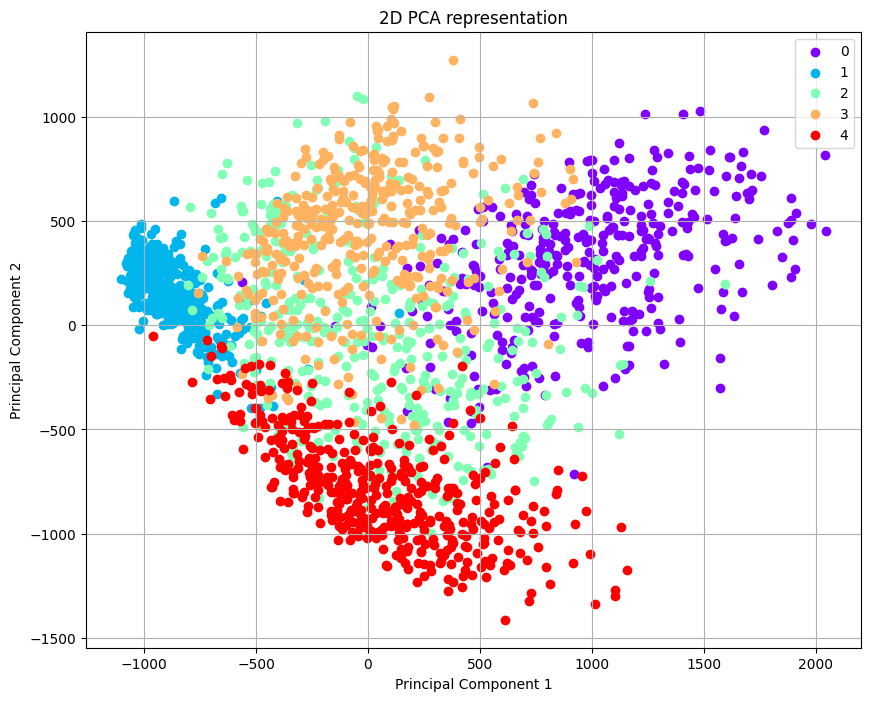

In [199]:
DatanewB = pd.read_csv('DataB.csv',encoding='latin-1')
eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvalues))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

# Extract the eigenvectors for the two largest eigenvalues
w = np.hstack((eigen_pairs[0][1].reshape(-1,1), eigen_pairs[1][1].reshape(-1,1)))

# Transform the data onto the two principal components
X_pca = np.dot(DataB_centered, w)

# Add the principal components to the DataFrame
DatanewB['PC1'] = X_pca[:, 0]
DatanewB['PC2'] = X_pca[:, 1]

# Plot the data points with colors based on their class
unique_classes = np.unique(DatanewB['gnd'])
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_classes)))
#colors = ["#3778bf", "#ffc107", "#6c757d", "#89a894", "#6a5a8c"]
plt.figure(figsize=(10, 8))

for class_label, color in zip(unique_classes, colors):
    plt.scatter(DatanewB.loc[DatanewB['gnd'] == class_label, 'PC1'],
                DatanewB.loc[DatanewB['gnd'] == class_label, 'PC2'],
                label=class_label,
                c= [color] )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA representation')
plt.legend()
plt.grid(True)
plt.show()

**2.**

**i. The eigenvectors are then sorted by the decreasing Eigenvalues as the eigenvectors with the highest eigenvalues carry the most information about the distribution of the data.**

**ii. The eigenvector with the highest eigenvalue is considered the first principal component since it accounts for the most variance in the data. The second highest eigenvector is the second principal component, and so on.**

**iii. After sorting, we choose the top 2 eigenvectors, which allows us to reduce the dimensionality of the dataset while retaining the most significant variance.**

**iv. The selected eigenvectors form a new axis, and we can project the original dataset onto this new subspace. This is done by multiplying the original standardized data (mean =0 sd = 1) by the matrix composed of the selected eigenvectors**

**v. Now we can plot the points of the transformed data. Each point is plotted according to its values for the first and second principal components. To differentiate between known classes in the dataset, we use different colors for each class's data points.**


**3. Repeat step 2 for the 5th and 6st components. Comment on the result.**

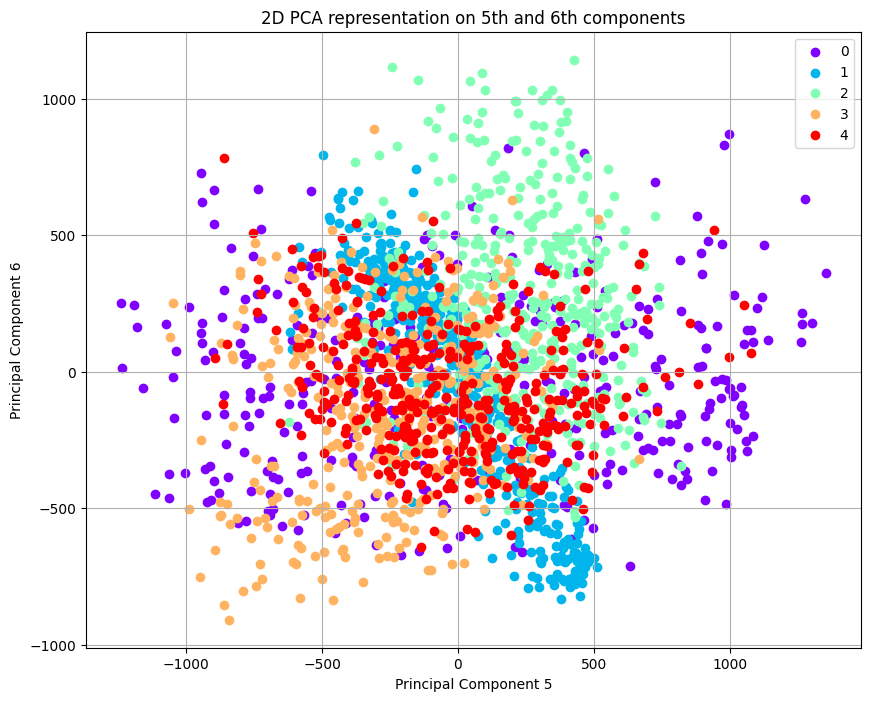

In [200]:
eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvalues))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

# Extract the eigenvectors for the 5th and 6th largest eigenvalues
# Note that Python uses 0-indexing, so the 5th component is at index 4 and the 6th at index 5.
w_56 = np.hstack((eigen_pairs[4][1].reshape(-1,1), eigen_pairs[5][1].reshape(-1,1)))

# Transform the data onto the 5th and 6th principal components
X_pca_56 = np.dot(DataB_centered, w_56)

# Add the 5th and 6th principal components to the DataFrame
DatanewB['PC5'] = X_pca_56[:, 0]
DatanewB['PC6'] = X_pca_56[:, 1]

# Plot the data points with colors based on their class
unique_classes = np.unique(DatanewB['gnd'])
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_classes)))
#colors = ["#3778bf", "#ffc107", "#6c757d", "#89a894", "#6a5a8c"]
plt.figure(figsize=(10, 8))

for class_label, color in zip(unique_classes, colors):
    plt.scatter(DatanewB.loc[DatanewB['gnd'] == class_label, 'PC5'],
                DatanewB.loc[DatanewB['gnd'] == class_label, 'PC6'],
                label=class_label,
                c=[color])

plt.xlabel('Principal Component 5')
plt.ylabel('Principal Component 6')
plt.title('2D PCA representation on 5th and 6th components')
plt.legend()
plt.grid(True)
# plt.show()

**3.**

**i. After sorting, we choose the  5th and 6th eigenvectors as given in the question to get the 5th and 6st principal component.**

**ii. The selected eigenvectors form a new axis, and we can project the original dataset onto this new subspace. This is done by multiplying the original standardized data (mean =0 sd = 1) by the matrix composed of the selected eigenvectors**

**iii. Now we can plot the points of the transformed data. Each point is plotted according to its values for the fifth and sixth principal components. To differentiate between known classes in the dataset, we use different colors for each class's data points.**



**Analysis based on the above two plots.**

**i. From the above two plots of the data on first and second principal components and fifth and sixth components, it can be visualized that the range of the variance described by the first two components is greater than that of 5th and 6th components.**

**ii. Classes have maximum variance in the first two components**

**iii The variance decreases as the 5th and 6th components are plotted; understood from the plot.**

**iv The Classes look more separated when projected on Principal Components 1 and 2 compared to the projection on Principal Components 5 and 6.**


**4. Use the Naive Bayes classifier to classify 8 sets of dimensionality reduced data (using the first 2, 4, 10, 30, 60, 200, 500, and all 784 PCA components). Plot the classification error for the 8 sets against the retained variance of each case.**

In [201]:
# Function to perform classification
def NaiveBayesClass(n, X, Digit_actual, eig_val, eig_vec):
    # Selecting n Principal components
    U = np.asmatrix(eig_vec[:,:n])
    # Projecting original dataset over n-components:
    Y = np.dot(U.T,X.T)
    Ret_Variance = sum(eig_val[:n])/sum(eig_val)

    df_PCA = pd.DataFrame(Y.T)
    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(df_PCA,
                                                        Digit_actual, test_size=0.3,
                                                        random_state=109)
    # Create a Gaussian Classifier
    gnb = GaussianNB()
    # Train the model using the training sets
    gnb.fit(X_train, y_train)

    # Predict the response for train dataset
    y_train_pred = gnb.predict(X_train)

    # Predict the response for train dataset
    y_pred = gnb.predict(X_test)

    # Model Accuracy, how often is the classifier
    # correct on train set (for overfitting)?
    train_error = (1 - accuracy_score(y_train, y_train_pred))

    # Model Accuracy, how often is the classifier correct?
    error = (1 - accuracy_score(y_test, y_pred))

    return Ret_Variance, error, train_error




In [202]:
def plotvar(final_metrics):
    df_final = pd.DataFrame(final_metrics,columns=['Retained Variance',
               'Classification Error Test','Classification Error Train'])

    fig, ax = plt.subplots(figsize=(10, 7))
    ax.plot(df_final['Retained Variance'], df_final['Classification Error Test'],
            'o-', label = 'Classification Error Test',color = 'orange')
    ax2 = plt.twinx()
    ax2.plot(df_final['Retained Variance'], df_final['Classification Error Train'],
             'o-', label = 'Classification Error Train', color = 'blue')
    ax.legend(loc=0)
    ax2.legend(loc=1)
    ax.set_xlabel("Variance Retained")
    ax.set_ylabel("Classification Error Test")
    ax2.set_ylabel("Classification Error Train")
    plt.show()

In [203]:
# Initialize a list to store metrics
final_metrics = []

# Loop over the component list and perform the tasks
#component_list = [2, 4, 10, 30, 60, 200, 500, 784]
component_list = [2,4,10,30,60,200,500,784]
for components in component_list:
    Ret_Variance, error_test, error_train = NaiveBayesClass(components, DataB_centered, DataB_Y, eigenvalues, eigenvectors)
    final_metrics.append({
        'Retained Variance': Ret_Variance,
        'Classification Error Test': error_test,
        'Classification Error Train': error_train
    })

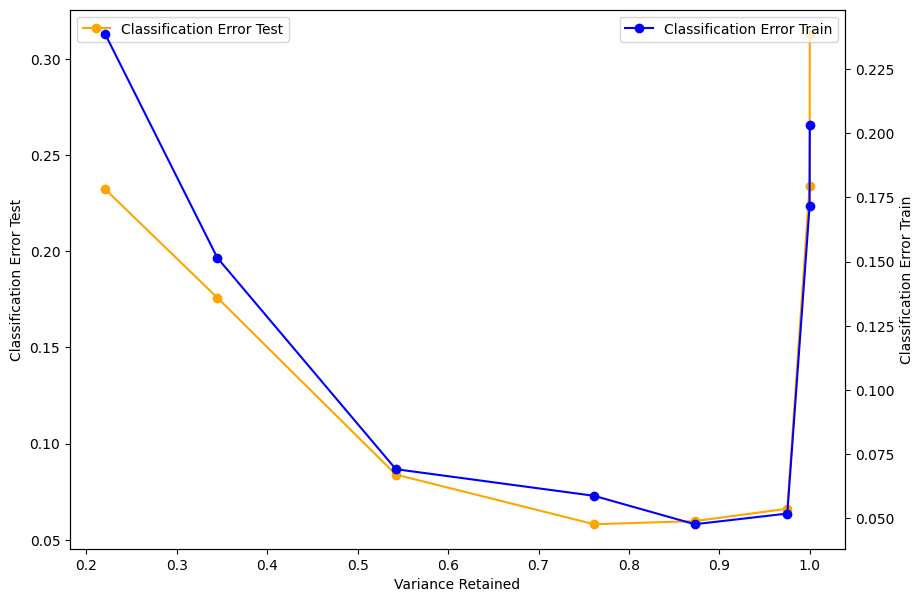

In [204]:
plotvar(final_metrics)

**4.**

**i. As the components are increased the retained variance is increased as it is accumulated and the error is decreasing.**

**ii. But after some point the variance is so high that it is overfitting.**


**5. As the class labels are already known, you can use the Linear Discriminant Analysis (LDA) to reduce the dimensionality, plot the data points using the first 2 LDA components
(display data points of each class with a different color). Explain the results obtained in
terms of the known classes. Compare with the results obtained by using PCA.**

In [205]:
lda = LDA(n_components=2)

# Fit the LDA model
#Non normalized data is passed here
scaler = StandardScaler()
X_std = scaler.fit_transform(DataB_X)
X_lda = lda.fit_transform(X_std, DataB_Y)

# Create a DataFrame for the LDA components
lda_df = pd.DataFrame(X_lda, columns=['LDA1', 'LDA2'])

# Add the class labels to the DataFrame
lda_df['class'] = DataB_Y

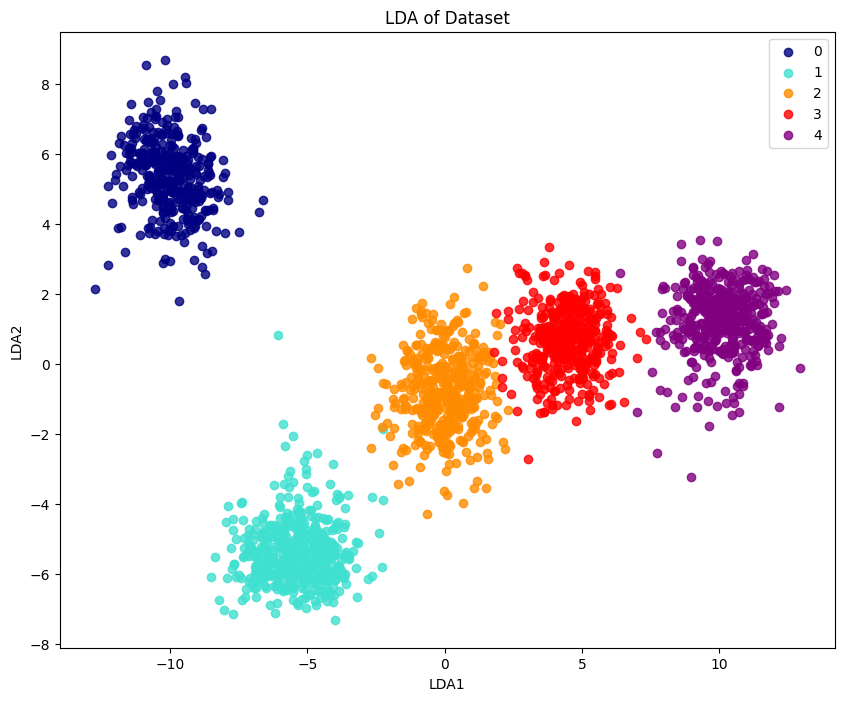

In [206]:
colors = ['navy', 'turquoise', 'darkorange', 'red', 'purple']

# Start the plot, set figure size and title
plt.figure(figsize=(10, 8))
plt.title('LDA of Dataset')

# Plot each class
for color, i, label in zip(colors, [0, 1, 2, 3, 4], [0, 1, 2, 3, 4]):
    plt.scatter(X_lda[DataB_Y == i, 0], X_lda[DataB_Y == i, 1], alpha=.8, color=color, label=label)

plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.legend(loc='best', shadow=False, scatterpoints=1)
#plt.title('LDA of Dataset (first two components)')

**In the above LDA the data passed is not centered.**

In [207]:
lda = LDA(n_components=2)

# Fit the LDA model
#Normalized data is passed here
scaler = StandardScaler()
X_std = scaler.fit_transform(DataB_centered)
X_lda = lda.fit_transform(X_std, DataB_Y)

# Create a DataFrame for the LDA components
lda_df = pd.DataFrame(X_lda, columns=['LDA1', 'LDA2'])

# Add the class labels to the DataFrame
lda_df['class'] = DataB_Y

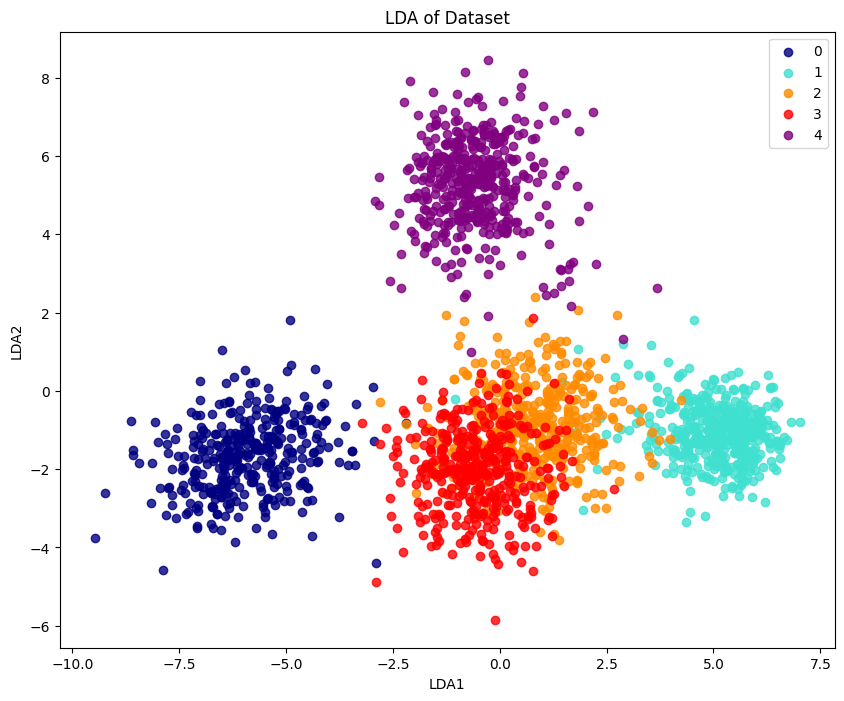

In [208]:
colors = ['navy', 'turquoise', 'darkorange', 'red', 'purple']

# Start the plot, set figure size and title
plt.figure(figsize=(10, 8))
plt.title('LDA of Dataset')

# Plot each class
for color, i, label in zip(colors, [0, 1, 2, 3, 4], [0, 1, 2, 3, 4]):
    plt.scatter(X_lda[DataB_Y == i, 0], X_lda[DataB_Y == i, 1], alpha=.8, color=color, label=label)

plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.legend(loc='best', shadow=False, scatterpoints=1)
#plt.title('LDA of Dataset (first two components)')

**In the Above the centered data is passed which was used for the PCA.**

**Analysis**

**i. In the first LDA plot the data was not normalized which was required in PCA.**

**ii. The second LDA plot the normalized data was used which was used in PCA.**

**iii. The first plot classifies the classes better than the second one in which normalized data was passed.**

**iv. In comparison to PCA, LDA classified the classes better. Comparing the results of LDA and PCA, it can be said that LDA tries to attain maximum separability of classes across different directions while principal components in PCA are in the direction of the maximum variance. So LDA outperforms PCA in lower dimensions.**

**6. Prove that the PCA is the best linear method for transformation (with orthonormal bases)**

Accuracy after PCA: 97.74193548387096
Accuracy after LDA: 93.38709677419355


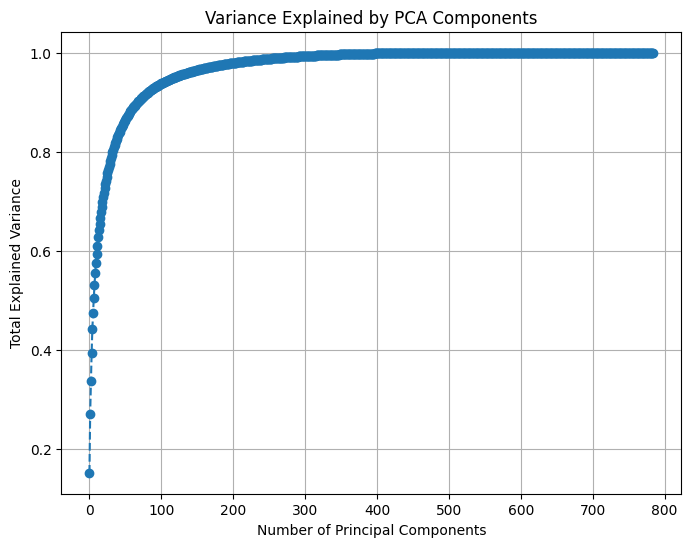

In [209]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
train_features, test_features, train_labels, test_labels = train_test_split(
    DataB_X, DataB_Y, test_size=0.3, random_state=109)

# Apply Principal Component Analysis
pca_transformer = PCA()
pca_train_features = pca_transformer.fit_transform(train_features)
pca_test_features = pca_transformer.transform(test_features)

# Apply Linear Discriminant Analysis
lda_transformer = LDA()
lda_train_features = lda_transformer.fit_transform(train_features, train_labels)
lda_test_features = lda_transformer.transform(test_features)

# Classifier using PCA features
classifier_pca = KNeighborsClassifier(n_neighbors=3)
classifier_pca.fit(pca_train_features, train_labels)
predictions_pca = classifier_pca.predict(pca_test_features)

# Classifier using LDA features
classifier_lda = KNeighborsClassifier(n_neighbors=3)
classifier_lda.fit(lda_train_features, train_labels)
predictions_lda = classifier_lda.predict(lda_test_features)

# Calculate and print the accuracies
accuracy_pca = accuracy_score(test_labels, predictions_pca)
accuracy_lda = accuracy_score(test_labels, predictions_lda)
print(f"Accuracy after PCA: {accuracy_pca*100}")
print(f"Accuracy after LDA: {accuracy_lda*100}")

# Visualize the variance explained by PCA components
plt.figure(figsize=(8, 6))
plt.plot(range(len(pca_transformer.explained_variance_ratio_)),
         np.cumsum(pca_transformer.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Total Explained Variance')
plt.title('Variance Explained by PCA Components')
plt.grid(True)
plt.show()

**Analysis:**

**The accuracy of PCA is higher than that of LDA. So it can be said that PCA is best linear method for transformation (with orthonormal bases)**